<a href="https://colab.research.google.com/github/Hemant10HM/FDS-Assignment-24mcs004/blob/main/FDS_SLR_%26_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df1=pd.read_csv('/content/drive/My Drive/Classroom/Foundation of Data Science/Simple linear regression.csv')
df2=pd.read_csv('/content/drive/My Drive/Classroom/Foundation of Data Science/Multiple linear regression.csv')
df1


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
df2

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [ ]:
#finding B0 and B1
df1.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
x_mean=np.mean(df1['SAT'])
y_mean=np.mean(df1['GPA'])
print(x_mean)
print(y_mean)

1845.2738095238096
3.330238095238095


In [ ]:
#linear regression analysis
B1_num=0
B1_den=0
for i in range(len(df1)):
  B1_num+=(df1['SAT'][i]-x_mean)*(df1['GPA'][i]-y_mean)
  B1_den+=(df1['SAT'][i]-x_mean)**2
  B1=B1_num/B1_den
print(B1)

0.001655688050092815


In [ ]:
B0=y_mean-(B1*x_mean)
print(B0)

0.2750402996602781


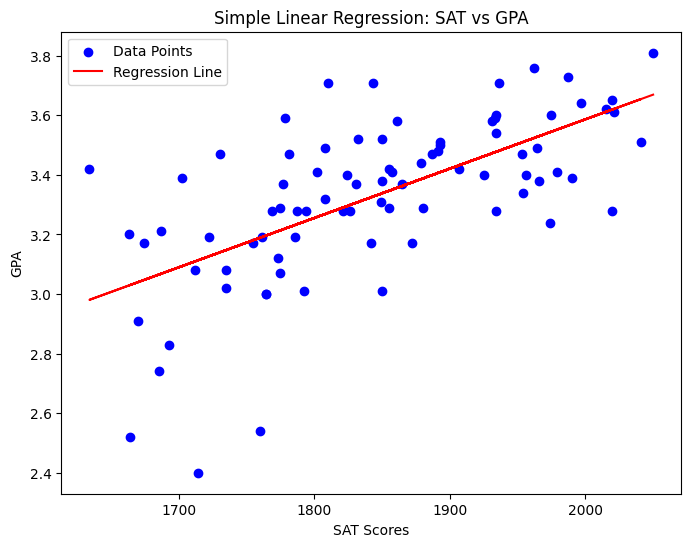

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['SAT'], df1['GPA'], color='blue', label='Data Points')
plt.plot(df1['SAT'], B0 + B1 * df1['SAT'], color='red', label='Regression Line')
plt.xlabel('SAT Scores')
plt.ylabel('GPA')
plt.title('Simple Linear Regression: SAT vs GPA')
plt.legend()
plt.show()

In [ ]:
y_hat=B0+B1*df1['SAT']
df1['y_hat']=y_hat
df1

,SAT,GPA,y_hat
0,1714,2.40,3.112890
1,1664,2.52,3.030105
2,1760,2.54,3.189051
3,1685,2.74,3.064875
4,1693,2.83,3.078120
...,...,...,...
79,1936,3.71,3.480452
80,1810,3.71,3.271836
81,1987,3.73,3.564892
82,1962,3.76,3.523500


In [ ]:
# prompt: design a code for calculate (GPA-y_hat)^2 and their summmision

sum_squared_errors = 0
for i in range(len(df1)):
  squared_error = (df1['GPA'][i] - df1['y_hat'][i])**2
  df1.loc[i, 'error']=squared_error
  sum_squared_errors += squared_error

print("Sum of squared errors:", sum_squared_errors)
#Sum of squared Residual (SSR)

Sum of squared errors: 3.6372727995805034


In [ ]:
# prompt: how to remove a column in data frame

df1 = df1.drop('SSE', axis=1)
df1 = df1.drop('sum_square_error', axis=1)
print(df1)


     SAT   GPA     y_hat     error
0   1714  2.40  3.112890  0.508212
1   1664  2.52  3.030105  0.260207
2   1760  2.54  3.189051  0.421268
3   1685  2.74  3.064875  0.105544
4   1693  2.83  3.078120  0.061564
..   ...   ...       ...       ...
79  1936  3.71  3.480452  0.052692
80  1810  3.71  3.271836  0.191988
81  1987  3.73  3.564892  0.027261
82  1962  3.76  3.523500  0.055932
83  2050  3.81  3.669201  0.019824

[84 rows x 4 columns]


In [ ]:
df1

,SAT,GPA,y_hat,error
0,1714,2.40,3.112890,0.508212
1,1664,2.52,3.030105,0.260207
2,1760,2.54,3.189051,0.421268
3,1685,2.74,3.064875,0.105544
4,1693,2.83,3.078120,0.061564
...,...,...,...,...
79,1936,3.71,3.480452,0.052692
80,1810,3.71,3.271836,0.191988
81,1987,3.73,3.564892,0.027261
82,1962,3.76,3.523500,0.055932


In [ ]:
# prompt: desinn code to calulate sum_squared_errors\root(summision of (x-x_mean)^2)
import math
sum_x_minus_x_mean_squared = 0
for i in range(len(df1)):
  sum_x_minus_x_mean_squared += (df1['SAT'][i] - x_mean)**2

standard_error_of_estimate = (sum_squared_errors / math.sqrt(sum_x_minus_x_mean_squared))

print("Standard error of estimate:", standard_error_of_estimate)



Standard error of estimate: 0.003819382311854956


In [ ]:
t=B1/standard_error_of_estimate
print(t)

0.43349628680892605


In [ ]:
dof=len(df1)-2 #here k =2 beacuse 2 column
print(dof)

82


In [ ]:
#default significance level 0.05
#here hypothesis was B1=0= H0
#use t calculator t_tab is 1.66

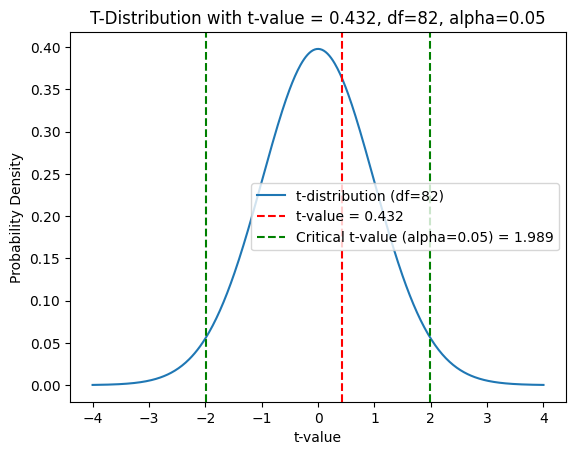

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
t_val = 0.432
dof = 82
alpha = 0.05

# Generate x-values for the t-distribution curve
x = np.linspace(-4, 4, 500)

# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, dof)

# Plot the t-distribution curve
plt.plot(x, pdf, label='t-distribution (df=82)')

# Add a vertical line at the calculated t-value
plt.axvline(x=t_val, color='red', linestyle='--', label='t-value = 0.432')

# Add critical t-values for two-tailed test
critical_t = stats.t.ppf(1 - alpha / 2, dof)
plt.axvline(x=critical_t, color='green', linestyle='--', label=f'Critical t-value (alpha=0.05) = {critical_t:.3f}')
plt.axvline(x=-critical_t, color='green', linestyle='--')


# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('T-Distribution with t-value = 0.432, df=82, alpha=0.05')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate x values
x_values = np.linspace(0, 10, 100)  # 100 values from 0 to 10

# Calculate the deterministic part of y
y_deterministic = 2 * x_values + 3

# Generate random error
random_error = np.random.normal(0, 6, size=x_values.shape)  # Mean = 0, StdDev = 1

# Calculate the y values with random error
y_values = y_deterministic + random_error

# Create a DataFrame
data = pd.DataFrame({'x': x_values, 'y': y_values})

# Print the first few rows of the dataset
print(data)



           x          y
0    0.00000   5.980285
1    0.10101   2.372434
2    0.20202   7.290172
3    0.30303  12.744240
4    0.40404   2.403161
..       ...        ...
95   9.59596  13.410830
96   9.69697  24.170661
97   9.79798  24.162291
98   9.89899  22.828661
99  10.00000  21.592477

[100 rows x 2 columns]


In [ ]:
data.describe()



,x,y
count,100.000000,100.000000
mean,5.000000,12.376921
std,2.930454,8.178311
min,0.000000,-5.853419
25%,2.500000,5.957155
50%,5.000000,12.485458
75%,7.500000,19.007428
max,10.000000,28.433021


In [ ]:
x_mean=np.mean(data['x'])
y_mean=np.mean(data['y'])
print(x_mean)
print(y_mean)

5.0
12.376920895635438


In [ ]:
B1_num=0
B1_den=0
for i in range(len(data)):
  B1_num+=(data['x'][i]-x_mean)*(data['y'][i]-y_mean)
  B1_den+=(data['x'][i]-x_mean)**2
  B1=B1_num/B1_den
print(B1)

2.0827596040199405


In [ ]:
B0=y_mean-(B1*x_mean)
print(B0)

1.9631228755357348


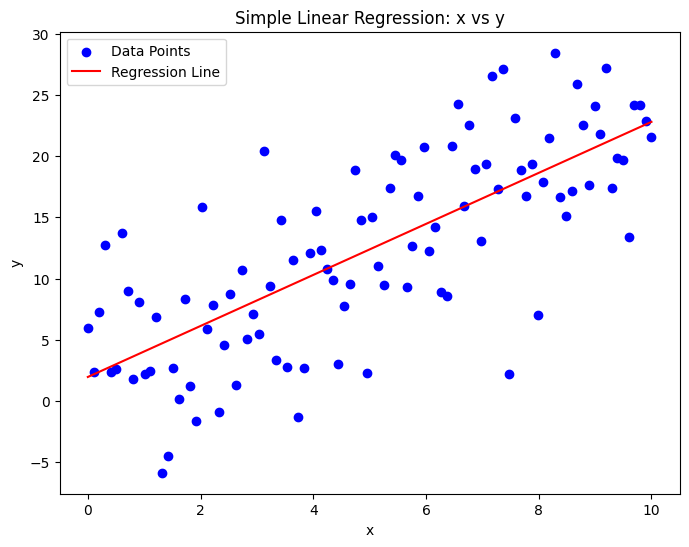

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Data Points')
plt.plot(data['x'], B0 + B1 * data['x'], color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression: x vs y')
plt.legend()
plt.show()

In [ ]:
y_hat=B0+B1*data['x']
data['y_hat']=y_hat
data

,x,y,y_hat
0,0.00000,5.980285,1.963123
1,0.10101,2.372434,2.173503
2,0.20202,7.290172,2.383882
3,0.30303,12.744240,2.594262
4,0.40404,2.403161,2.804642
...,...,...,...
95,9.59596,13.410830,21.949200
96,9.69697,24.170661,22.159580
97,9.79798,24.162291,22.369959
98,9.89899,22.828661,22.580339


In [ ]:
# prompt: design a code for calculate (GPA-y_hat)^2 and their summmision

sum_squared_errors = 0
for i in range(len(data)):
  squared_error = (data['y'][i] - data['y_hat'][i])**2
  data.loc[i, 'error']=squared_error
  sum_squared_errors += squared_error

print("Sum of squared errors:", sum_squared_errors)
#Sum of squared Residual (SSR)

Sum of squared errors: 2933.65696859308


In [ ]:
data

,x,y,y_hat,error
0,0.00000,5.980285,1.963123,16.137591
1,0.10101,2.372434,2.173503,0.039574
2,0.20202,7.290172,2.383882,24.071674
3,0.30303,12.744240,2.594262,103.022045
4,0.40404,2.403161,2.804642,0.161187
...,...,...,...,...
95,9.59596,13.410830,21.949200,72.903769
96,9.69697,24.170661,22.159580,4.044448
97,9.79798,24.162291,22.369959,3.212453
98,9.89899,22.828661,22.580339,0.061664
